# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [ ]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

Размер данных (признаки): (846, 19)
Размер данных (целевые переменные): (846,)


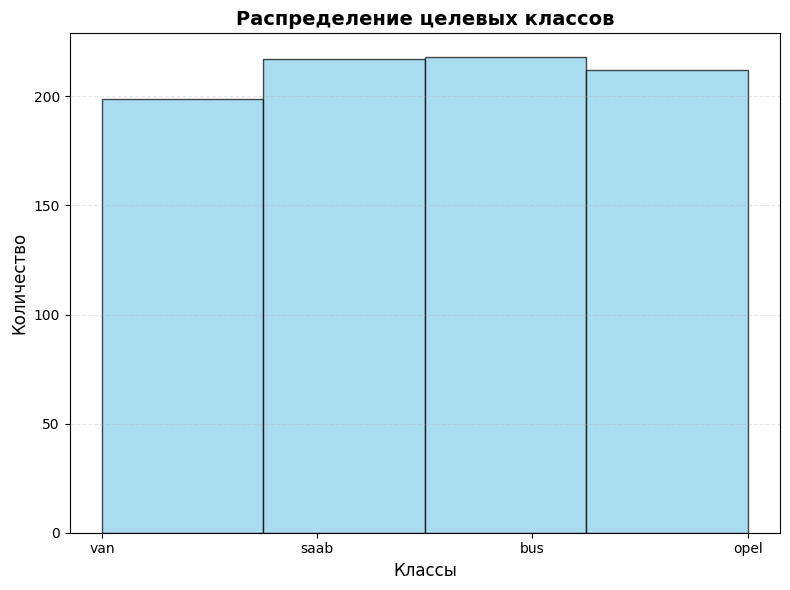

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка набора данных из CSV-файла
# Используем pd.read_csv для чтения данных и указания разделителя и отсутствия заголовков
car_dataset = pd.read_csv("car_data.csv", delimiter=',', header=None).values

# Разделение данных на признаки и целевую переменную
# Преобразуем признаки в целочисленный формат
features = car_dataset[:, :-1].astype(int)  # Все столбцы, кроме последнего
labels = car_dataset[:, -1]  # Последний столбец для целевых значений

# Проверка размеров матриц данных и целевых значений
print("Размер данных (признаки):", features.shape)
print("Размер данных (целевые переменные):", labels.shape)

# Визуализация распределения целевых классов
plt.figure(figsize=(8, 6))  # Размер графика
plt.hist(labels, bins=len(set(labels)), color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Распределение целевых классов", fontsize=14, fontweight='bold')
plt.xlabel("Классы", fontsize=12)
plt.ylabel("Количество", fontsize=12)
plt.grid(axis='y', alpha=0.3, linestyle='--')  # Добавляем сетку только по оси Y
plt.tight_layout()
plt.show()


Размер обучающей выборки (признаки): (549, 19)
Размер обучающей выборки (целевые значения): (549,)
Размер тестовой выборки (признаки): (297, 19)
Размер тестовой выборки (целевые значения): (297,)


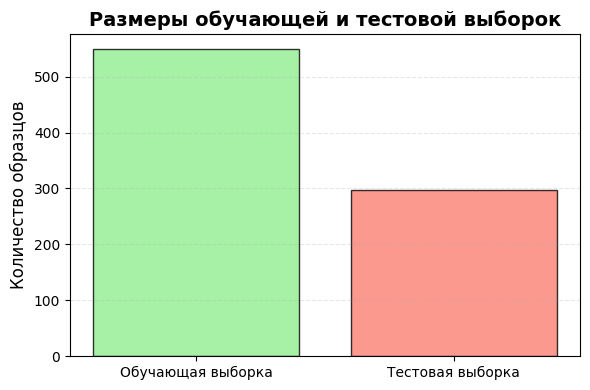

In [ ]:
from sklearn.model_selection import train_test_split

# Разделение данных на обучающую и тестовую выборки
# Указываем размер тестовой выборки как 35%
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.35, random_state=42)

# Проверяем размеры полученных выборок
print("Размер обучающей выборки (признаки):", X_train.shape)
print("Размер обучающей выборки (целевые значения):", y_train.shape)
print("Размер тестовой выборки (признаки):", X_test.shape)
print("Размер тестовой выборки (целевые значения):", y_test.shape)

# Визуализация размера выборок
plt.figure(figsize=(6, 4))  # Размер графика
plt.bar(["Обучающая выборка", "Тестовая выборка"],
        [len(y_train), len(y_test)],
        color=["lightgreen", "salmon"], edgecolor='black', alpha=0.8)
plt.title("Размеры обучающей и тестовой выборок", fontsize=14, fontweight='bold')
plt.ylabel("Количество образцов", fontsize=12)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

Первые 10 строк обучающей выборки:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,822,95,41,82,170,65,9,145,46,19,145,163,314,140,64,4,8,199,207
1,486,104,57,103,222,72,12,221,30,25,177,223,718,218,72,11,12,186,195
2,182,91,42,66,169,66,7,145,44,19,140,169,325,159,67,4,0,201,207
3,375,109,52,95,189,58,4,227,29,25,158,262,776,217,82,0,19,187,186
4,528,95,47,73,195,70,7,167,38,20,152,184,430,185,69,9,19,200,206
5,223,81,44,72,139,60,6,153,44,19,146,180,347,178,81,1,15,182,186
6,840,93,34,66,140,56,7,130,51,18,120,151,251,114,62,5,29,201,207
7,593,89,43,77,147,54,8,144,46,19,146,163,308,174,64,13,5,194,201
8,346,117,52,110,228,65,12,212,31,24,163,228,668,220,66,21,25,194,205
9,357,109,49,109,193,59,10,207,32,24,156,225,635,213,70,13,31,191,202


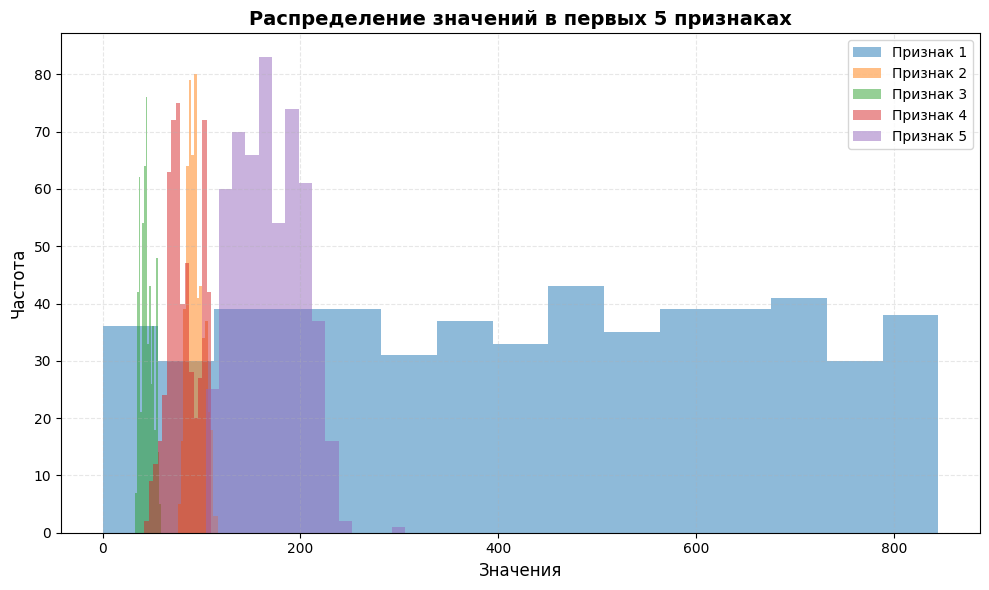

In [ ]:
# Преобразование обучающей выборки в DataFrame для удобства анализа
X_train_pd = pd.DataFrame(X_train)

# Вывод первых 10 строк из обучающей выборки
print("Первые 10 строк обучающей выборки:")
display(X_train_pd.head(10))  # Используем display для более удобного отображения

# Визуализация распределения значений в первых нескольких столбцах
plt.figure(figsize=(10, 6))  # Размер графика
for col in range(min(5, X_train_pd.shape[1])):  # Рассматриваем первые 5 столбцов
    plt.hist(X_train_pd.iloc[:, col], bins=15, alpha=0.5, label=f"Признак {col+1}")

plt.title("Распределение значений в первых 5 признаках", fontsize=14, fontweight='bold')
plt.xlabel("Значения", fontsize=12)
plt.ylabel("Частота", fontsize=12)
plt.legend(loc="upper right", fontsize=10)
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()


Methods `describe` and `info` deliver some useful information.

In [ ]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,425.723133,93.520947,44.675774,81.801457,168.204007,61.644809,8.457195,167.327869,41.273224,20.468124,147.438980,186.734062,431.540984,173.763206,72.158470,6.522769,12.646630,188.998179,195.854281
std,242.288797,8.063277,6.154680,15.928751,33.047995,7.110666,3.945857,32.506680,7.777590,2.526030,14.631309,30.436279,171.479332,31.793047,7.335198,4.980796,8.833356,6.298389,7.449629
min,0.000000,76.000000,33.000000,42.000000,104.000000,47.000000,2.000000,114.000000,26.000000,17.000000,118.000000,131.000000,191.000000,112.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,217.000000,87.000000,40.000000,70.000000,140.000000,57.000000,7.000000,146.000000,34.000000,19.000000,136.000000,167.000000,317.000000,148.000000,67.000000,2.000000,6.000000,184.000000,191.000000
50%,430.000000,93.000000,44.000000,79.000000,165.000000,61.000000,8.000000,157.000000,43.000000,20.000000,145.000000,177.000000,363.000000,173.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,636.000000,99.000000,49.000000,98.000000,195.000000,66.000000,10.000000,196.000000,46.000000,23.000000,159.000000,216.000000,576.000000,196.000000,75.000000,10.000000,19.000000,193.000000,201.000000
max,845.000000,117.000000,59.000000,110.000000,306.000000,126.000000,52.000000,265.000000,59.000000,29.000000,186.000000,288.000000,1018.000000,268.000000,127.000000,22.000000,40.000000,206.000000,211.000000


In [ ]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int32
 1   1       549 non-null    int32
 2   2       549 non-null    int32
 3   3       549 non-null    int32
 4   4       549 non-null    int32
 5   5       549 non-null    int32
 6   6       549 non-null    int32
 7   7       549 non-null    int32
 8   8       549 non-null    int32
 9   9       549 non-null    int32
 10  10      549 non-null    int32
 11  11      549 non-null    int32
 12  12      549 non-null    int32
 13  13      549 non-null    int32
 14  14      549 non-null    int32
 15  15      549 non-null    int32
 16  16      549 non-null    int32
 17  17      549 non-null    int32
 18  18      549 non-null    int32
dtypes: int32(19)
memory usage: 40.9 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

Информация о наборе данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845 entries, 0 to 844
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       845 non-null    int64 
 1   95      845 non-null    int64 
 2   48      845 non-null    int64 
 3   83      845 non-null    int64 
 4   178     845 non-null    int64 
 5   72      845 non-null    int64 
 6   10      845 non-null    int64 
 7   162     845 non-null    int64 
 8   42      845 non-null    int64 
 9   20      845 non-null    int64 
 10  159     845 non-null    int64 
 11  176     845 non-null    int64 
 12  379     845 non-null    int64 
 13  184     845 non-null    int64 
 14  70      845 non-null    int64 
 15  6       845 non-null    int64 
 16  16      845 non-null    int64 
 17  187     845 non-null    int64 
 18  197     845 non-null    int64 
 19  van     845 non-null    object
dtypes: int64(19), object(1)
memory usage: 132.2+ KB

Количество пропущенны

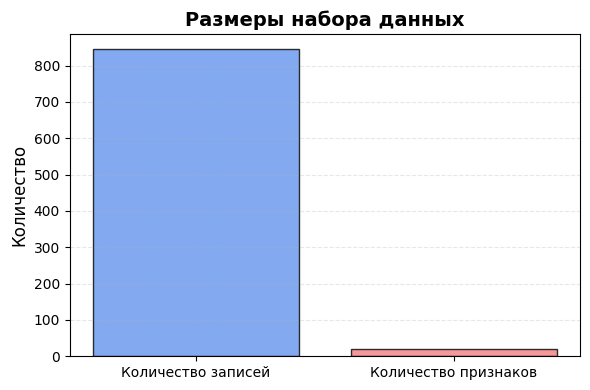

In [ ]:
# Загрузка набора данных
car_data = pd.read_csv("car_data.csv")

# Информация о наборе данных
print("Информация о наборе данных:")
car_data.info()

# Проверка на пропущенные значения
missing_values = car_data.isnull().sum()
print("\nКоличество пропущенных значений по столбцам:")
print(missing_values)

# Визуализация количества записей и признаков
plt.figure(figsize=(6, 4))  # Размер графика
plt.bar(["Количество записей", "Количество признаков"],
        [car_data.shape[0], car_data.shape[1]],
        color=["cornflowerblue", "lightcoral"], edgecolor='black', alpha=0.8)
plt.title("Размеры набора данных", fontsize=14, fontweight='bold')
plt.ylabel("Количество", fontsize=12)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()


Столбцы после переименования:
Index(['ID', 'COMPACTNESS', 'CIRCULARITY', 'DISTANCE CIRCULARITY',
       'RADIUS RATIO', 'PRAXIS ASPECT RATIO', 'MAXLENGTH ASPECT RATIO',
       'SCATTER RATIO', 'ELONGATEDNESS', 'PRAXIS RECTANGULARITY',
       'MAXLENGTH RECTANGULARITY', 'SCALED VARIANCE ALONG MAJOR AXIS',
       'SCALED VARIANCE ALONG MINOR AXIS', 'SCALED RADIUS OF GYRATION',
       'SKEWNESS ABOUT MAJOR AXIS', 'SKEWNESS ABOUT MINOR AXIS',
       'KURTOSIS ABOUT MINOR AXIS', 'KURTOSIS ABOUT MAJOR AXIS',
       'HOLLOWS RATIO', 'CLASS LABEL'],
      dtype='object')

Уникальные значения в столбце 'CLASS LABEL':
[3 2 0 1]


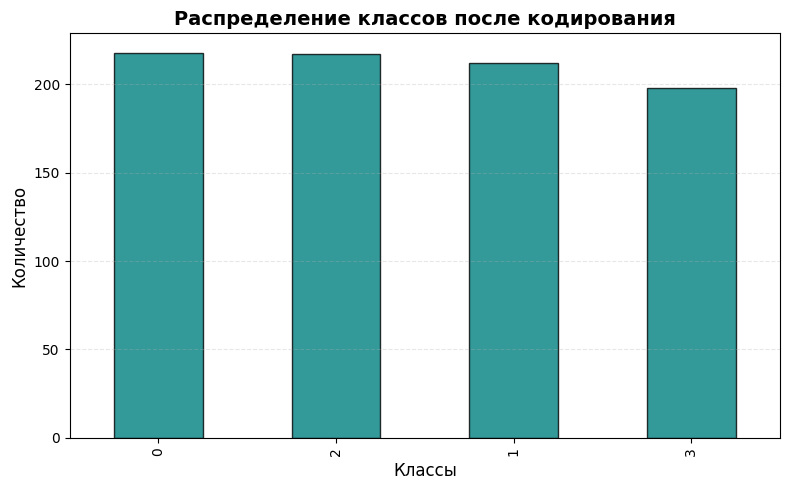

In [ ]:
# Задание новых имен столбцов
new_column_names = [
    "ID", "COMPACTNESS", "CIRCULARITY", "DISTANCE CIRCULARITY", "RADIUS RATIO",
    "PRAXIS ASPECT RATIO", "MAXLENGTH ASPECT RATIO", "SCATTER RATIO",
    "ELONGATEDNESS", "PRAXIS RECTANGULARITY", "MAXLENGTH RECTANGULARITY",
    "SCALED VARIANCE ALONG MAJOR AXIS", "SCALED VARIANCE ALONG MINOR AXIS",
    "SCALED RADIUS OF GYRATION", "SKEWNESS ABOUT MAJOR AXIS", "SKEWNESS ABOUT MINOR AXIS",
    "KURTOSIS ABOUT MINOR AXIS", "KURTOSIS ABOUT MAJOR AXIS", "HOLLOWS RATIO",
    "CLASS LABEL"
]

# Переименование столбцов набора данных
car_data.columns = new_column_names
print("Столбцы после переименования:")
print(car_data.columns)

# Кодирование категориального признака "CLASS LABEL"
# Преобразование столбца в тип 'category' и присвоение числовых кодов
car_data['CLASS LABEL'] = car_data['CLASS LABEL'].astype('category').cat.codes

# Проверка уникальных значений после кодирования
print("\nУникальные значения в столбце 'CLASS LABEL':")
print(car_data['CLASS LABEL'].unique())

# Визуализация распределения классов после кодирования
plt.figure(figsize=(8, 5))  # Размер графика
car_data['CLASS LABEL'].value_counts().plot(kind='bar', color='teal', edgecolor='black', alpha=0.8)
plt.title("Распределение классов после кодирования", fontsize=14, fontweight='bold')
plt.xlabel("Классы", fontsize=12)
plt.ylabel("Количество", fontsize=12)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()


In [ ]:
car_data.head()

,ID,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PRAXIS ASPECT RATIO,MAXLENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PRAXIS RECTANGULARITY,MAXLENGTH RECTANGULARITY,SCALED VARIANCE ALONG MAJOR AXIS,SCALED VARIANCE ALONG MINOR AXIS,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT MAJOR AXIS,SKEWNESS ABOUT MINOR AXIS,KURTOSIS ABOUT MINOR AXIS,KURTOSIS ABOUT MAJOR AXIS,HOLLOWS RATIO,CLASS LABEL
0,1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,3
1,2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,2
2,3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,3
3,4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,0
4,5,107,57,106,172,50,6,255,26,28,169,280,957,264,85,5,9,181,183,0


#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

c:\Users\ekart\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


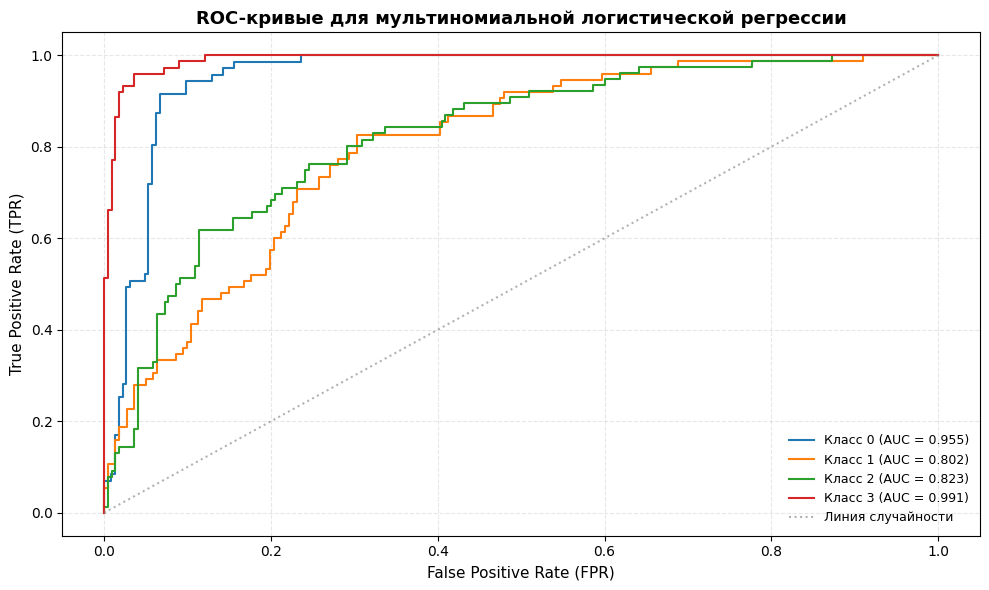

Точность на тесте: 0.709
F1-мера на тесте: 0.709
Лучшие параметры: {'C': 0.1}


In [ ]:
# Импорт необходимых библиотек
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Разделение данных на признаки и целевую переменную
X = car_data.drop(columns=['ID', 'CLASS LABEL'])
y = car_data['CLASS LABEL']

# Разделение выборок на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# Настройка модели логистической регрессии с параметром multinomial
logistic_model = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)

# Гиперпараметры для поиска
hyperparameter_grid = {
    'C': [0.1, 1, 10]
}

# GridSearchCV для оптимизации гиперпараметров
cv_search = GridSearchCV(estimator=logistic_model, param_grid=hyperparameter_grid, cv=5, scoring='f1_micro', n_jobs=-1)
cv_search.fit(X_train, y_train)

# Получение оптимальной модели
optimal_model = cv_search.best_estimator_

# Оценка модели на тестовой выборке
y_test_predictions = optimal_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_predictions)
test_f1_score = f1_score(y_test, y_test_predictions, average='micro')

# Бинаризация меток для построения ROC-кривых
y_test_binary = label_binarize(y_test, classes=list(range(len(y.unique()))))
y_pred_probabilities = optimal_model.predict_proba(X_test)

# Построение ROC-кривых для каждого класса с обновлёнными настройками
plt.figure(figsize=(10, 6))  # Уменьшен размер графика
plt.grid(alpha=0.3, linestyle='--')  # Сетка с пунктирным стилем

for class_index in range(y_test_binary.shape[1]):
    false_positive_rate, true_positive_rate, _ = roc_curve(y_test_binary[:, class_index], y_pred_probabilities[:, class_index])
    auc_score = roc_auc_score(y_test_binary[:, class_index], y_pred_probabilities[:, class_index])
    plt.plot(false_positive_rate, true_positive_rate, label=f'Класс {class_index} (AUC = {auc_score:.3f})', linewidth=1.5, linestyle='-')  # Стили линии

plt.plot([0, 1], [0, 1], color='gray', linestyle=':', alpha=0.6, label="Линия случайности")  # Диагональная линия
plt.xlabel("False Positive Rate (FPR)", fontsize=11)
plt.ylabel("True Positive Rate (TPR)", fontsize=11)
plt.title("ROC-кривые для мультиномиальной логистической регрессии", fontsize=13, fontweight='bold')
plt.legend(loc="lower right", fontsize=9, frameon=False)  # Легенда без рамки
plt.tight_layout()
plt.show()

# Вывод метрик и лучших параметров
print(f"Точность на тесте: {test_accuracy:.3f}")
print(f"F1-мера на тесте: {test_f1_score:.3f}")
print(f"Лучшие параметры: {cv_search.best_params_}")


#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot.

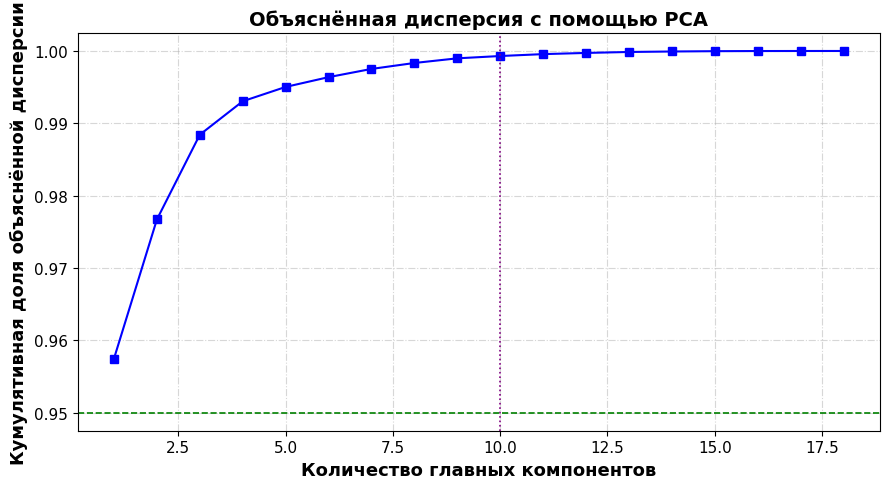

In [ ]:
from sklearn.decomposition import PCA

# Инициализация PCA и подгонка на обучающих данных
pca_model = PCA()
pca_model.fit(X_train)

# Построение графика кумулятивной доли объяснённой дисперсии с настройками
plt.figure(figsize=(9, 5))  # Увеличенный размер графика для лучшей читаемости
plt.plot(range(1, len(pca_model.explained_variance_ratio_) + 1),
         pca_model.explained_variance_ratio_.cumsum(),
         marker='s', linestyle='-', linewidth=1.5, color='blue')  # Другой стиль и цвет линии
plt.axhline(y=0.95, color='green', linestyle='--', linewidth=1.2)  # Горизонтальная линия на уровне 95%
plt.axvline(x=10, color='purple', linestyle=':', linewidth=1.2)  # Вертикальная линия для акцента на 10 компонентах
plt.grid(alpha=0.5, linestyle='-.')  # Настроенная сетка с точечно-штриховым стилем
plt.xticks(fontsize=11)  # Размер шрифта подписей по оси X
plt.yticks(fontsize=11)  # Размер шрифта подписей по оси Y
plt.xlabel('Количество главных компонентов', fontsize=13, fontweight='bold')  # Настроенный шрифт
plt.ylabel('Кумулятивная доля объяснённой дисперсии', fontsize=13, fontweight='bold')
plt.title('Объяснённая дисперсия с помощью PCA', fontsize=14, fontweight='bold')
plt.tight_layout()  # Компактное расположение элементов
plt.show()


#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

Размеры обучающего набора после PCA: (549, 10)
Размеры тестового набора после PCA: (296, 10)


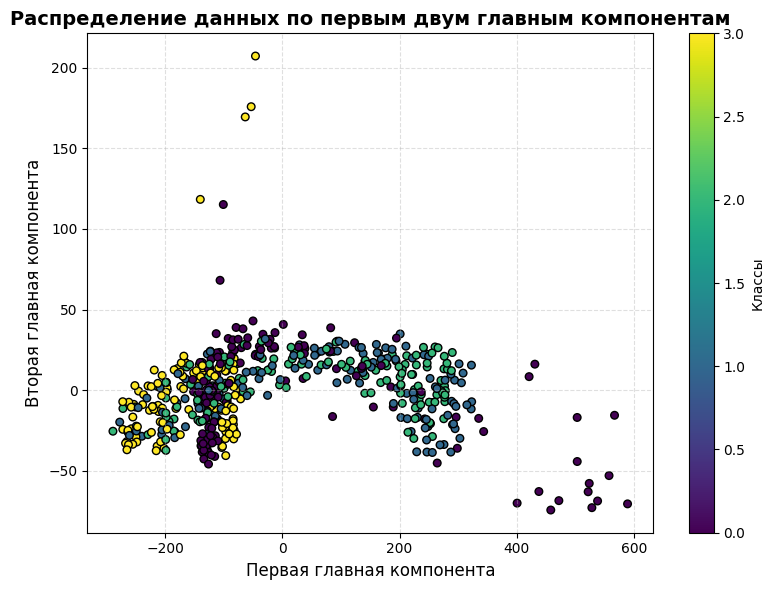

In [ ]:
from sklearn.decomposition import PCA

# Выбор количества главных компонентов на основе графика объяснённой дисперсии
pca = PCA(n_components=10)  # Пример: выбрано 10 компонентов

# Применение PCA к обучающему и тестовому наборам данных
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Проверка результата преобразования
print(f"Размеры обучающего набора после PCA: {X_train_pca.shape}")
print(f"Размеры тестового набора после PCA: {X_test_pca.shape}")

# Визуализация первых двух главных компонентов
plt.figure(figsize=(8, 6))  # Размер графика
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=30)
plt.title("Распределение данных по первым двум главным компонентам", fontsize=14, fontweight='bold')
plt.xlabel("Первая главная компонента", fontsize=12)
plt.ylabel("Вторая главная компонента", fontsize=12)
plt.colorbar(label="Классы")  # Цветовая шкала для классов
plt.grid(alpha=0.4, linestyle='--')  # Сетка с настройками
plt.tight_layout()
plt.show()


**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

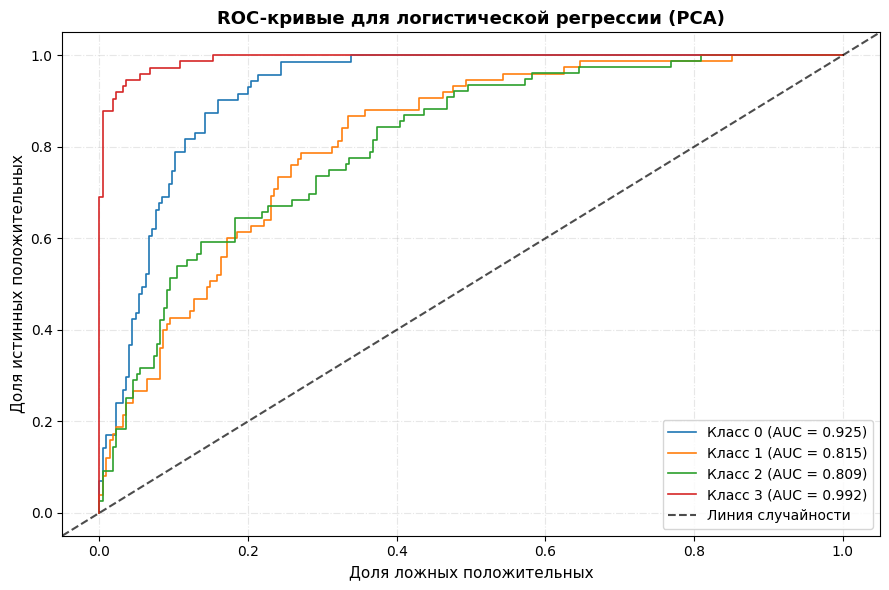

Точность на тестовой выборке: 0.666
F1-мера на тестовой выборке: 0.666
Лучшие параметры: {'C': 0.1}


In [ ]:
from sklearn.preprocessing import label_binarize

# Бинаризация меток тестовых данных
y_test_binarized = label_binarize(y_test, classes=list(range(len(y.unique()))))

# Построение ROC-кривых
probabilities_pca = grid_search_pca.predict_proba(X_test_pca)

plt.figure(figsize=(9, 6))  # Размер графика
plt.grid(alpha=0.3, linestyle='-.')  # Добавление сетки с точечно-штриховым стилем

for class_idx in range(y_test_binarized.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, class_idx], probabilities_pca[:, class_idx])
    auc_score = roc_auc_score(y_test_binarized[:, class_idx], probabilities_pca[:, class_idx])
    plt.plot(fpr, tpr, label=f'Класс {class_idx} (AUC = {auc_score:.3f})', linestyle='-', linewidth=1.2)  # Другой стиль линий

plt.axline((0, 0), slope=1, color='black', linestyle='--', alpha=0.7, label="Линия случайности")  # Диагональная линия
plt.xlabel("Доля ложных положительных", fontsize=11)
plt.ylabel("Доля истинных положительных", fontsize=11)
plt.title("ROC-кривые для логистической регрессии (PCA)", fontsize=13, fontweight='bold')
plt.legend(loc="lower right", fontsize=10, frameon=True, shadow=False)  # Легенда без тени
plt.tight_layout()
plt.show()

# Вывод результатов
print(f"Точность на тестовой выборке: {pca_accuracy:.3f}")
print(f"F1-мера на тестовой выборке: {pca_f1_score:.3f}")
print(f"Лучшие параметры: {grid_search_pca.best_params_}")


#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

Точность на тестовой выборке (Decision Tree): 0.672
F1-мера на тестовой выборке (Decision Tree): 0.672
Лучшие параметры модели дерева решений: {'max_depth': 6}


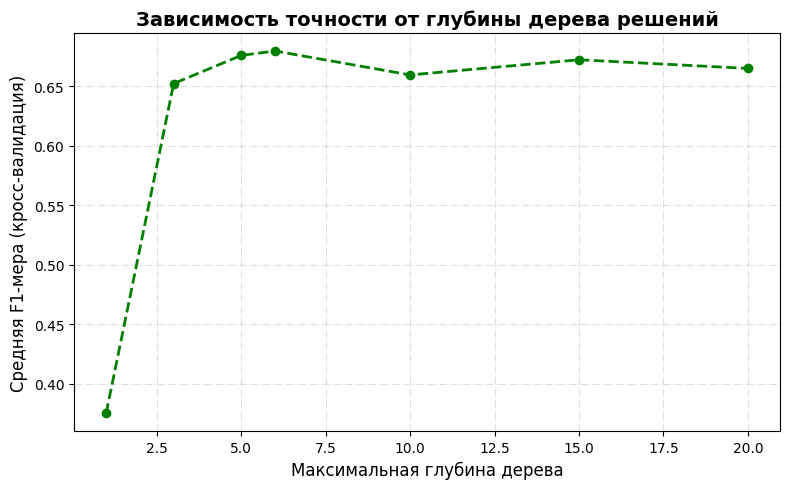

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score

# Инициализация модели дерева решений
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Определение гиперпараметров для настройки (максимальная глубина дерева)
hyperparameter_grid_tree = {
    'max_depth': [1, 3, 5, 6, 10, 15, 20]
}

# GridSearchCV для настройки гиперпараметров с перекрёстной проверкой
grid_search_tree = GridSearchCV(estimator=decision_tree_model, param_grid=hyperparameter_grid_tree, cv=5, scoring='f1_micro', n_jobs=-1)
grid_search_tree.fit(X_train, y_train)

# Оценка модели на тестовых данных
tree_predictions = grid_search_tree.predict(X_test)
tree_accuracy = accuracy_score(y_test, tree_predictions)
tree_f1_score = f1_score(y_test, tree_predictions, average='micro')

# Вывод результатов
print(f"Точность на тестовой выборке (Decision Tree): {tree_accuracy:.3f}")
print(f"F1-мера на тестовой выборке (Decision Tree): {tree_f1_score:.3f}")
print(f"Лучшие параметры модели дерева решений: {grid_search_tree.best_params_}")

# Визуализация зависимости точности от глубины дерева
cv_results = grid_search_tree.cv_results_['mean_test_score']
plt.figure(figsize=(8, 5))  # Размер графика
plt.plot(hyperparameter_grid_tree['max_depth'], cv_results, marker='o', color='green', linestyle='--', linewidth=2)
plt.title("Зависимость точности от глубины дерева решений", fontsize=14, fontweight='bold')
plt.xlabel("Максимальная глубина дерева", fontsize=12)
plt.ylabel("Средняя F1-мера (кросс-валидация)", fontsize=12)
plt.grid(alpha=0.4, linestyle='-.')
plt.tight_layout()
plt.show()


#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble?

In [ ]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression setup without multi_class
logistic_model = LogisticRegression(solver='saga', tol=1e-3, max_iter=500)

# GridSearch for best logistic regression model
param_grid = {'C': [0.1, 1, 10]}
grid_search_log_reg = GridSearchCV(estimator=logistic_model, param_grid=param_grid, cv=5, scoring='f1_micro', n_jobs=-1)
grid_search_log_reg.fit(X_train, y_train)

# Best logistic regression model
best_log_reg = grid_search_log_reg.best_estimator_

c:\Users\ekart\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ekart\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ekart\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ekart\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ekart\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the 

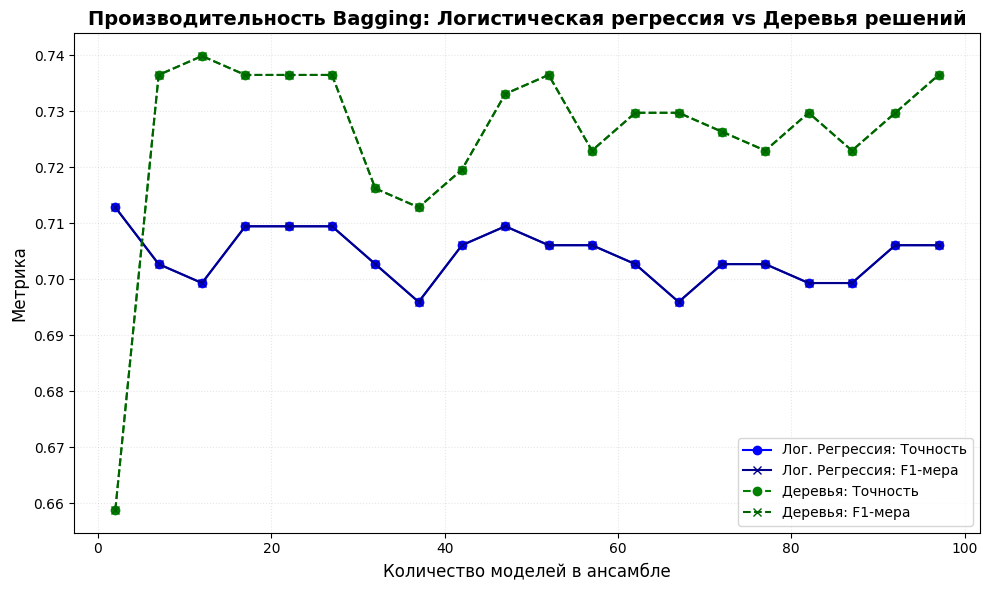

Оптимальное количество моделей для логистической регрессии: 2


In [ ]:
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

# Диапазон количества моделей в ансамбле
n_estimators_range = range(2, 101, 5)

# Для хранения результатов
log_reg_scores = {'accuracy': [], 'f1': []}
tree_scores = {'accuracy': [], 'f1': []}

# Оценка Bagging для логистической регрессии и деревьев решений с разным числом моделей
for n_estimators in n_estimators_range:
    # Bagging для логистической регрессии
    bagging_log_reg = BaggingClassifier(estimator=best_log_reg, n_estimators=n_estimators, random_state=42)
    bagging_log_reg.fit(X_train, y_train)
    y_pred_log_reg = bagging_log_reg.predict(X_test)
    log_reg_scores['accuracy'].append(accuracy_score(y_test, y_pred_log_reg))
    log_reg_scores['f1'].append(f1_score(y_test, y_pred_log_reg, average='micro'))

    # Bagging для деревьев решений
    bagging_tree = BaggingClassifier(estimator=grid_search_tree.best_estimator_, n_estimators=n_estimators, random_state=42)
    bagging_tree.fit(X_train, y_train)
    y_pred_tree = bagging_tree.predict(X_test)
    tree_scores['accuracy'].append(accuracy_score(y_test, y_pred_tree))
    tree_scores['f1'].append(f1_score(y_test, y_pred_tree, average='micro'))

# Построение графика
plt.figure(figsize=(10, 6))  # Размер графика

# Результаты логистической регрессии
plt.plot(n_estimators_range, log_reg_scores['accuracy'], label='Лог. Регрессия: Точность', marker='o', color='blue')
plt.plot(n_estimators_range, log_reg_scores['f1'], label='Лог. Регрессия: F1-мера', marker='x', color='darkblue')

# Результаты деревьев решений
plt.plot(n_estimators_range, tree_scores['accuracy'], label='Деревья: Точность', marker='o', linestyle='--', color='green')
plt.plot(n_estimators_range, tree_scores['f1'], label='Деревья: F1-мера', marker='x', linestyle='--', color='darkgreen')

# Настройки графика
plt.xlabel('Количество моделей в ансамбле', fontsize=12)
plt.ylabel('Метрика', fontsize=12)
plt.title('Производительность Bagging: Логистическая регрессия vs Деревья решений', fontsize=14, fontweight='bold')
plt.legend(fontsize=10, loc='lower right', frameon=True)
plt.grid(alpha=0.3, linestyle=':')
plt.tight_layout()
plt.show()

# Анализ результатов
optimal_n_estimators = n_estimators_range[np.argmax(log_reg_scores['f1'])]
print(f"Оптимальное количество моделей для логистической регрессии: {optimal_n_estimators}")


#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

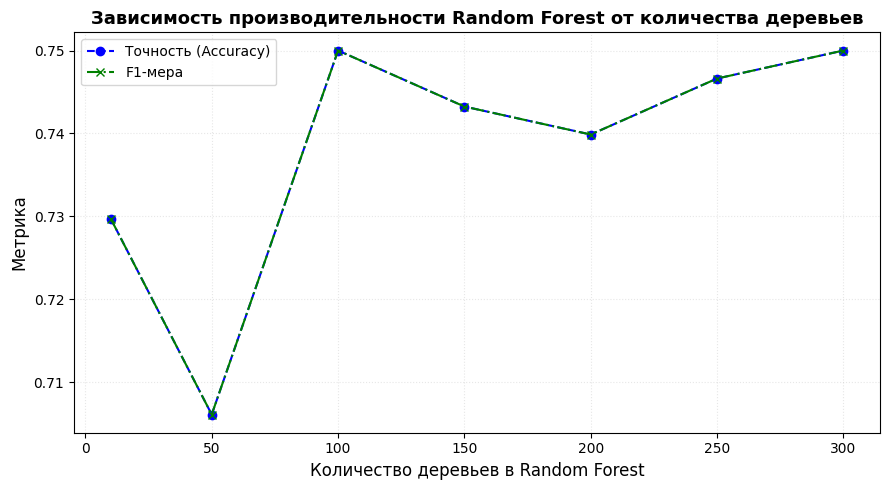

Оптимальное количество деревьев: 100
Точность: 0.750, F1-мера: 0.750


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

# Инициализация модели Random Forest
rf_clf = RandomForestClassifier(random_state=42)

# Диапазон количества деревьев в Random Forest
n_estimators_range = [10 , 50, 100, 150, 200, 250, 300]

# Для хранения результатов
rf_scores = {'accuracy': [], 'f1': []}

# Оценка модели Random Forest для разного количества деревьев
for n_estimators in n_estimators_range:
    # Задание количества деревьев и обучение модели
    rf_clf.set_params(n_estimators=n_estimators)
    rf_clf.fit(X_train, y_train)

    # Предсказания на тестовом наборе
    y_pred_rf = rf_clf.predict(X_test)

    # Расчёт точности и F1-меры
    rf_scores['accuracy'].append(accuracy_score(y_test, y_pred_rf))
    rf_scores['f1'].append(f1_score(y_test, y_pred_rf, average='micro'))

# Построение графиков
plt.figure(figsize=(9, 5))  # Размер графика
plt.plot(n_estimators_range, rf_scores['accuracy'], label='Точность (Accuracy)', marker='o', linestyle='--', color='blue')
plt.plot(n_estimators_range, rf_scores['f1'], label='F1-мера', marker='x', linestyle='-.', color='green')

# Настройка графика
plt.xlabel('Количество деревьев в Random Forest', fontsize=12)
plt.ylabel('Метрика', fontsize=12)
plt.title('Зависимость производительности Random Forest от количества деревьев', fontsize=13, fontweight='bold')
plt.legend(loc='best', fontsize=10, frameon=True)
plt.grid(alpha=0.3, linestyle=':')
plt.tight_layout()
plt.show()

# Определение оптимального количества деревьев
optimal_n_trees = n_estimators_range[rf_scores['f1'].index(max(rf_scores['f1']))]
print(f"Оптимальное количество деревьев: {optimal_n_trees}")

# Вывод метрик для оптимального количества деревьев
accuracy_rf = max(rf_scores['accuracy'])
f1_rf = max(rf_scores['f1'])
print(f"Точность: {accuracy_rf:.3f}, F1-мера: {f1_rf:.3f}")


#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it?

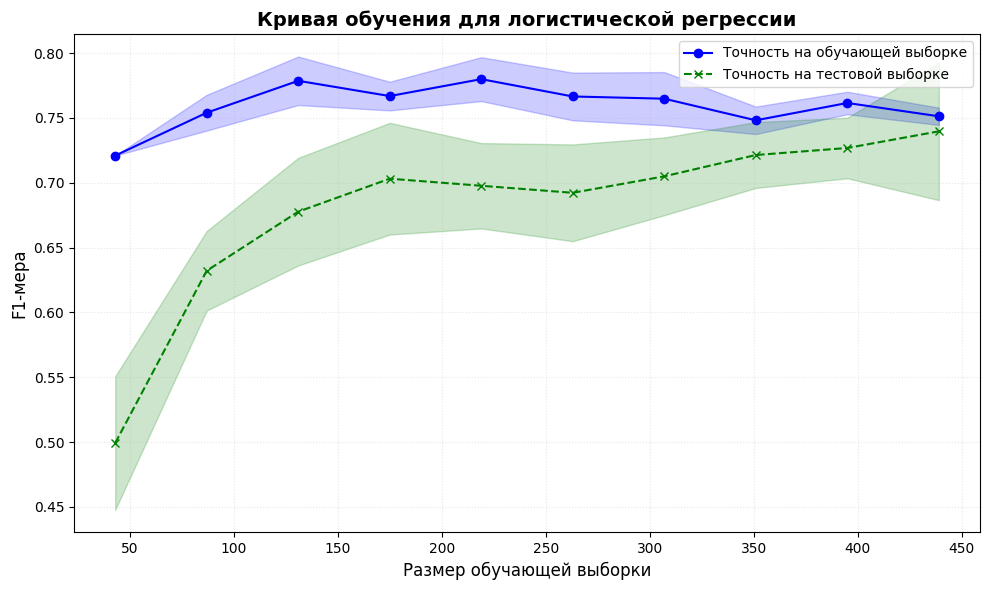

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Вычисление кривой обучения для логистической регрессии
train_sizes, train_scores, test_scores = learning_curve(
    estimator=best_log_reg,  # Лучшая модель логистической регрессии
    X=X_train,
    y=y_train,
    cv=5,
    scoring='f1_micro',
    train_sizes=np.linspace(0.1, 1.0, 10),  # Разделение обучающей выборки от 10% до 100%
    n_jobs=-1
)

# Вычисление средних и стандартных отклонений
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Построение кривой обучения
plt.figure(figsize=(10, 6))  # Размер графика
plt.plot(train_sizes, train_mean, label='Точность на обучающей выборке', color='blue', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)

plt.plot(train_sizes, test_mean, label='Точность на тестовой выборке', color='green', marker='x', linestyle='--')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)

# Настройки графика
plt.xlabel('Размер обучающей выборки', fontsize=12)
plt.ylabel('F1-мера', fontsize=12)
plt.title('Кривая обучения для логистической регрессии', fontsize=14, fontweight='bold')
plt.legend(loc='best', fontsize=10, frameon=True)
plt.grid(alpha=0.3, linestyle=':')
plt.tight_layout()
plt.show()


#### 2.9. Boosting
Your goal is to build a boosting ensemble using xgboost, CatBoost or lightgbm package.
Please, do not use the sklearn API for these models.

Find optimal number of decision trees in the boosting ensembe using grid search or other methods.
Please, explain your answer.

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score

# Инициализация модели XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Определение сетки гиперпараметров
xgb_param_grid = {
    'n_estimators': [10, 50, 100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2, 0.3]
}

# GridSearchCV для настройки гиперпараметров
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, cv=5, scoring='f1_micro', n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)

# Оценка модели на тестовых данных
xgb_predictions = grid_search_xgb.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_f1_score = f1_score(y_test, xgb_predictions, average='micro')

# Вывод результатов
print(f"Точность модели XGBoost: {xgb_accuracy:.3f}")
print(f"F1-мера модели XGBoost: {xgb_f1_score:.3f}")
print(f"Лучшие параметры XGBoost: {grid_search_xgb.best_params_}")


Точность модели XGBoost: 0.757
F1-мера модели XGBoost: 0.757
Лучшие параметры XGBoost: {'learning_rate': 0.3, 'n_estimators': 50}
